Dropped Attack type and tried predicting if there is an attack that took place or not.

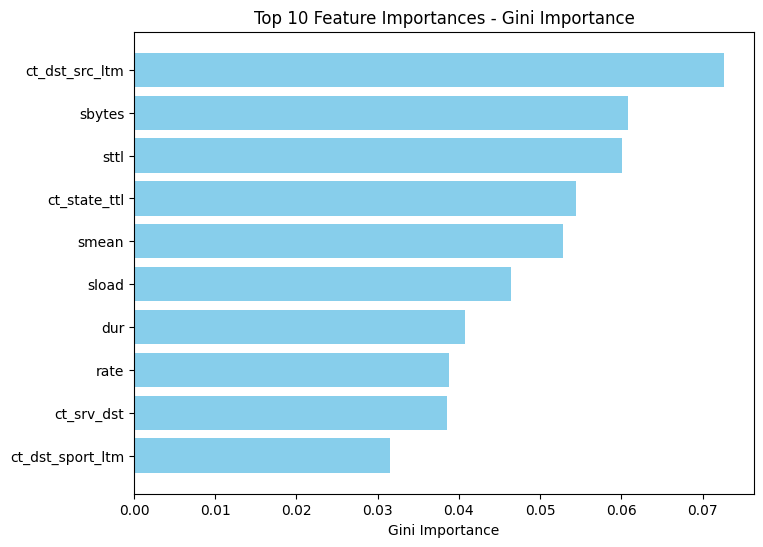

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1647/1647 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9072 - loss: 0.2265 - val_accuracy: 0.9998 - val_loss: 0.0011
Epoch 2/20
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9991 - loss: 0.0045 - val_accuracy: 0.9998 - val_loss: 7.6108e-04
Epoch 3/20
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9994 - loss: 0.0020 - val_accuracy: 0.9998 - val_loss: 0.0015
Epoch 4/20
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 0.9999 - val_loss: 0.0014
Epoch 5/20
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.9999 - val_loss: 0.0011
Epoch 6/20
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9999 - val_loss: 8.9289e-04
Epoch 7/20
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9999 - val_loss: 0.0011
Epoch 8/20
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9999 - loss: 5.0085e-04 -

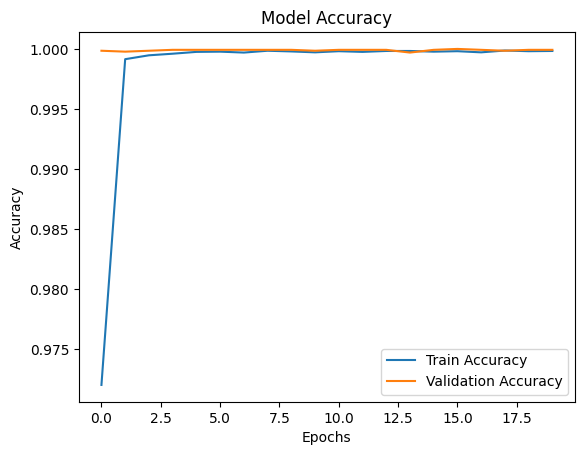

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Step 1: Load the Dataset
data = pd.read_csv("UNSW_NB15_trainingset.csv")

# Step 2: Preprocess the Data
# Check for missing values
#print("Missing values:\n", data.isnull().sum())

# Separate features and target
X = data.drop('id', axis=1)
X = X.drop('label', axis=1)
X = X.drop('attack_cat', axis=1)
y = data['label']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Encode categorical variables in X if present
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance and RF predictions
feature_importances = rf.feature_importances_
rf_train_probs = rf.predict_proba(X_train)
rf_test_probs = rf.predict_proba(X_test)

sorted_idx = np.argsort(feature_importances)[::-1]  # Sorting in descending order
top_10_idx = sorted_idx[:10]  # Get the indices of the top 10 features
top_10_features = feature_names[top_10_idx]  # Top 10 feature names
top_10_importances = feature_importances[top_10_idx]  # Top 10 importances

# Plot the top 10 feature importances
plt.figure(figsize=(8, 6))
plt.barh(top_10_features, top_10_importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Top 10 Feature Importances - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

# Step 4: Combine RF Outputs with Original Features
X_train_combined = np.hstack((X_train, rf_train_probs))
X_test_combined = np.hstack((X_test, rf_test_probs))

# Step 5: Build the Deep Learning Model
model = Sequential([
    Dense(64, input_dim=X_train_combined.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_combined, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Step 6: Evaluate the Hybrid Model
# Predict on the test set
y_pred_dl = (model.predict(X_test_combined) > 0.5).astype(int)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_dl))
print("Classification Report:\n", classification_report(y_test, y_pred_dl))
print("AUC-ROC Score:", roc_auc_score(y_test, model.predict(X_test_combined)))

# Step 7: Visualize Results (Optional)
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Predicting attack type


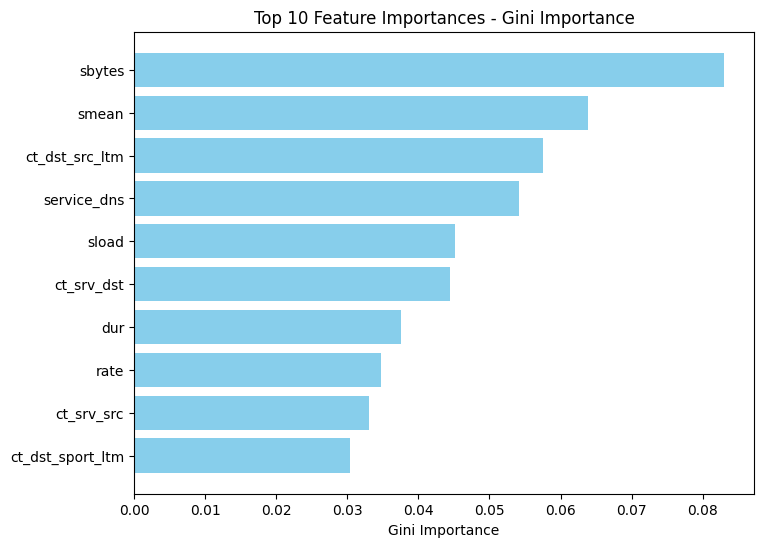

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1647/1647 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7443 - loss: 0.9086 - val_accuracy: 0.9062 - val_loss: 0.2114
Epoch 2/30
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9028 - loss: 0.2597 - val_accuracy: 0.9289 - val_loss: 0.1725
Epoch 3/30
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9189 - loss: 0.2049 - val_accuracy: 0.9330 - val_loss: 0.1609
Epoch 4/30
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9246 - loss: 0.1871 - val_accuracy: 0.9323 - val_loss: 0.1581
Epoch 5/30
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9268 - loss: 0.1749 - val_accuracy: 0.9331 - val_loss: 0.1547
Epoch 6/30
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9301 - loss: 0.1711 - val_accuracy: 0.9355 - val_loss: 0.1544
Epoch 7/30
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9282 - loss: 0.1706 - val_accuracy: 0.9324 - val_loss: 0.1545
Epoch 8/30
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9294 - loss: 0.1676 - val_accurac

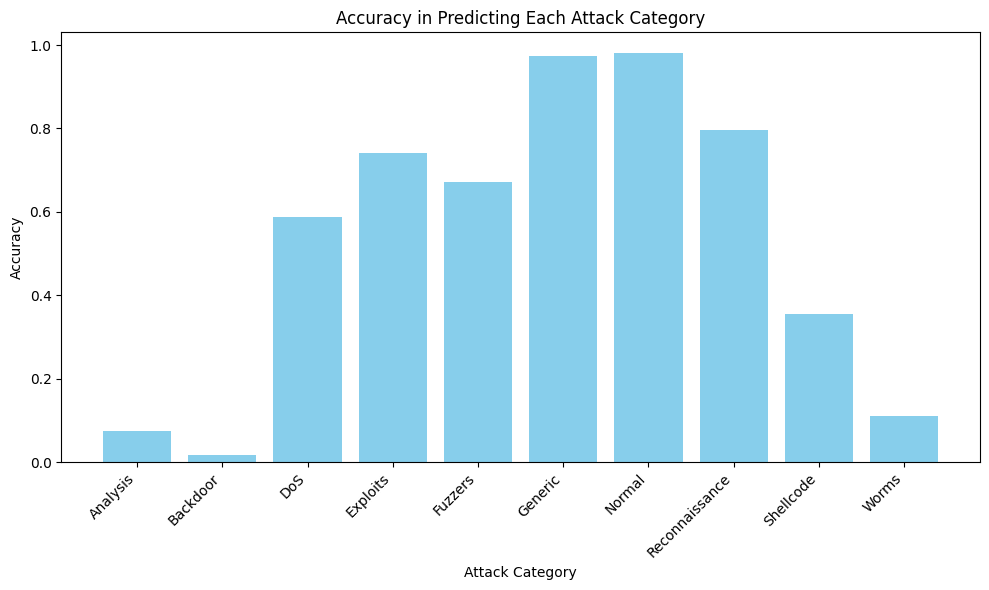

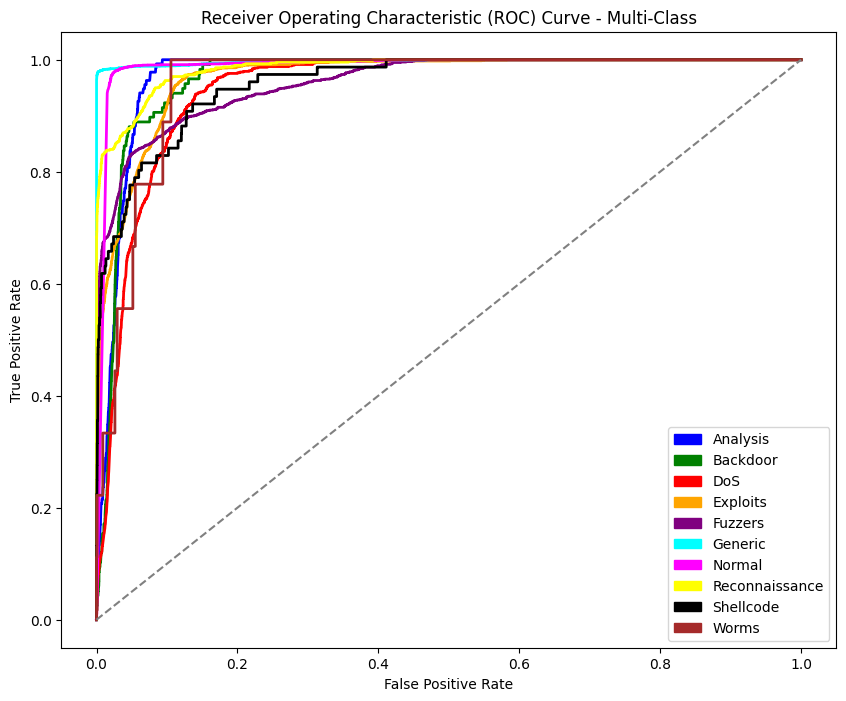

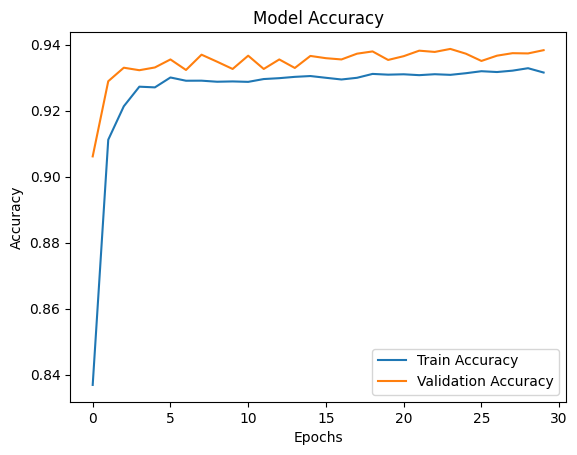

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Step 1: Load the Dataset
data = pd.read_csv("UNSW_NB15_trainingset.csv")

# Step 2: Preprocess the Data
# Check for missing values
#print("Missing values:\n", data.isnull().sum())

# Separate features and target
X = data.drop('id', axis=1)
X = X.drop('label', axis=1)
X = X.drop('attack_cat', axis=1)  # Replace 'label' with the actual target column name
y = data['attack_cat']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Encode categorical variables in X if present
X = pd.get_dummies(X, drop_first=True)

# Save feature names for later use
feature_names = X.columns  # This gives the feature names

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance and RF predictions
feature_importances = rf.feature_importances_
rf_train_probs = rf.predict_proba(X_train)
rf_test_probs = rf.predict_proba(X_test)

# # Built-in feature importance (Gini Importance)
# feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': feature_importances}).sort_values('Gini Importance', ascending=False)
# print(feature_imp_df)

# Plot feature importance
sorted_idx = np.argsort(feature_importances)[::-1]  # Sorting in descending order
top_10_idx = sorted_idx[:10]  # Get the indices of the top 10 features
top_10_features = feature_names[top_10_idx]  # Top 10 feature names
top_10_importances = feature_importances[top_10_idx]  # Top 10 importances

# Plot the top 10 feature importances
plt.figure(figsize=(8, 6))
plt.barh(top_10_features, top_10_importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Top 10 Feature Importances - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

# Step 4: Combine RF Outputs with Original Features
X_train_combined = np.hstack((X_train, rf_train_probs))
X_test_combined = np.hstack((X_test, rf_test_probs))

# Step 5: Build the Deep Learning Model
num_classes = len(label_encoder.classes_)  # Get the number of classes
model = Sequential([
    Dense(64, input_dim=X_train_combined.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')   # Binary classification
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_combined, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Step 6: Evaluate the Hybrid Model
# Predict on the test set
y_pred_dl = np.argmax(model.predict(X_test_combined), axis=1)  # Get predicted class labels

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_dl))
print("Classification Report:\n", classification_report(y_test, y_pred_dl, zero_division=0))
print("AUC-ROC Score:", roc_auc_score(y_test, model.predict(X_test_combined), multi_class='ovr'))
#print("AUC-ROC Score:", roc_auc_score(y_test, model.predict(X_test_combined)))

# Step 7: Plot ROC Curve for Multi-Class Classification
# Get predicted probabilities for each class
y_pred_prob = model.predict(X_test_combined)
y_pred_labels = np.argmax(y_pred_prob, axis=1)  # Get predicted class labels

# Calculate accuracy for each label
accuracy_per_label = []
for label in range(num_classes):
    # Get indices where the true label is equal to the current label
    indices = np.where(y_test == label)

    # Calculate accuracy for this label
    accuracy = accuracy_score(y_test[indices], y_pred_labels[indices])
    accuracy_per_label.append(accuracy)

# Plot accuracy per label
plt.figure(figsize=(10, 6))
plt.bar(label_encoder.classes_, accuracy_per_label, color='skyblue')
plt.xlabel('Attack Category')
plt.ylabel('Accuracy')
plt.title('Accuracy in Predicting Each Attack Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


# Calculate the ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = num_classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'brown']   # Use more colors if needed

# Create custom legend handles
legend_handles = []
for i in range(n_classes):
    legend_handles.append(mpatches.Patch(color=colors[i], label=f'{label_encoder.classes_[i]}'))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'{label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')


# Plot the diagonal line for random classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-Class')
plt.legend(handles=legend_handles, loc='lower right')
plt.show()

# Step 8: Visualize Training Results (Optional)
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()